In [3]:
import pandas as pd
import seaborn as sb
import warnings
warnings.simplefilter('ignore')
%pylab inline
from pylab import rcParams
rcParams['figure.figsize'] = 9,6

Populating the interactive namespace from numpy and matplotlib


## Matplotlib

In [7]:
df1=pd.read_csv('NBA_Players.csv')

In [8]:
df1=df1.dropna(0)

In [9]:
df1_1=df1[['height','weight','born']].groupby('born').mean()

In [12]:
df1_1.head()

,height,weight
born,,
1915.0,206.000000,99.000000
1917.0,190.000000,91.500000
1918.0,187.750000,83.000000
1919.0,195.200000,88.400000
1920.0,190.642857,89.357143


Посмотрим на соотношение среднего веса\роста баскетболистов, для этого сгруппируем их средний рост и вес по годам.
В данном случае удобно смотреть на Scatter Plot.

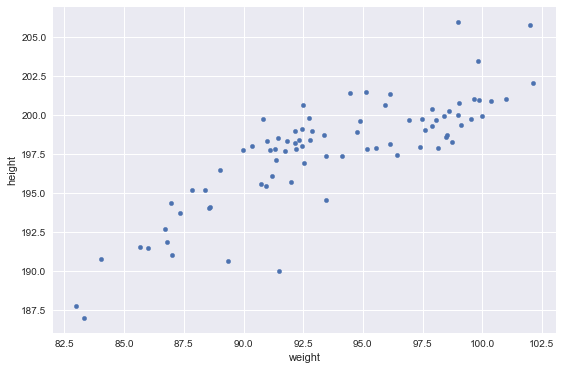

In [13]:
df1_1.plot.scatter(y='height', x='weight');

In [14]:
df2=pd.read_csv('NBA_Seasons_Stats.csv')

In [15]:
df2=df2.fillna(0)

In [16]:
df2['MP']=df2.MP.astype('int64')
df2['PTS']=df2.PTS.astype('int64')
df2['Year']=df2.Year.astype(int)

In [17]:
df2_1=df2[['PTS','MP','Year']].groupby('Year').sum()

In [18]:
df2_1=df2_1.drop(df2_1.index[0])

In [19]:
df2_1.head()

,PTS,MP
Year,,
1950,103562,0
1951,65338,0
1952,58096,168323
1953,64356,192253
1954,55252,167478


Теперь посмотрим на суммарное количество очков и сыгранного времени, сгруппированое по годам.

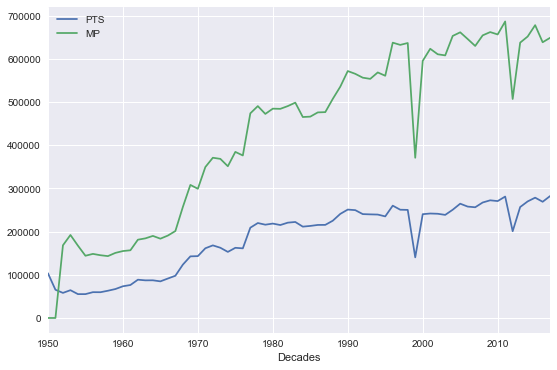

In [80]:
df2_1.plot().set(xlabel='Decades',ylabel='');

## Seaborn

In [81]:
df3=pd.read_csv('tmdb_5000_movies.csv')

In [82]:
#df3=df3.dropna()

In [83]:
df3['Year']=df3.release_date.str[:4]

In [84]:
df3['Year']=df3.Year.convert_objects(convert_numeric=True).fillna(0)

In [85]:
df3['Year']=df3.Year.astype(int)

In [86]:
df3['Year'].to_csv('aaa.csv')

In [87]:
df3['test']=df3.Year.transform(lambda x: x-x%10)

In [88]:
df3_1=df3[['budget','test']].groupby('test').mean().reset_index()

Посмотрим на размер бюджета фильмов по декадам, используем Bar Plot, тут в глаза бросаются 1920е, если посмотреть данные, то окажется что в базе всего 4 фильма из 1920х, причём один из них имеет бюджет 9млн, а остальнные 200-300т.

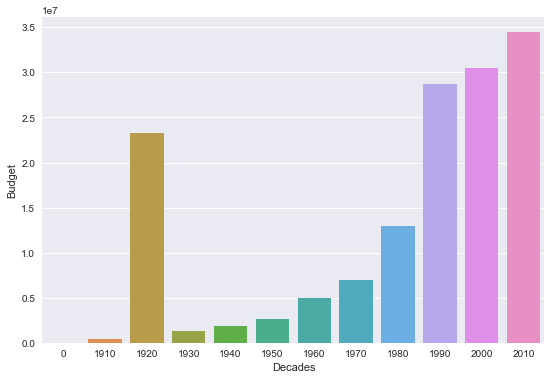

In [89]:
sb.barplot(x='test', y='budget', data=df3_1).set(xlabel='Decades', ylabel='Budget');

Используем не среднее, а медиану, тогда значения выравниваются, что интересно, при этом на первое место выходит 1900е.

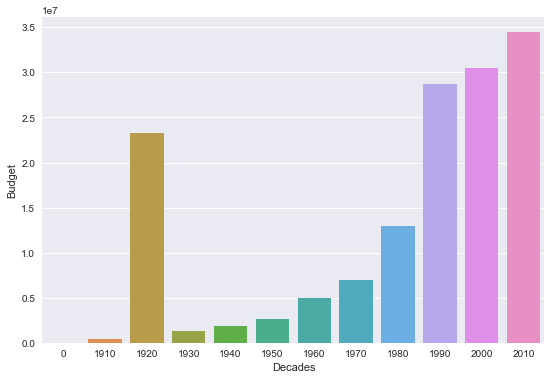

In [90]:
sb.barplot(x='test', y='budget', data=df3_1).set(xlabel='Decades', ylabel='Budget');

Посмотрим на распределение длительности фильмов по декадам, используем BarPlot, видно, что в среднем длина фильмов около 2ч часов.

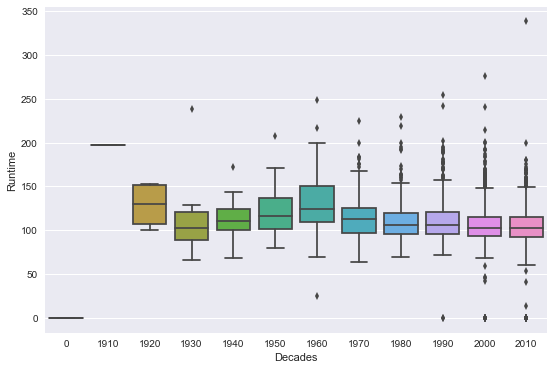

In [91]:
sb.boxplot(y='runtime', x='test', data=df3).set(xlabel='Decades',ylabel='Runtime');

## Plotly

In [1]:
from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

In [4]:
df4=pd.read_csv('sber.csv')

In [5]:
df4.head()

,timestamp,oil_urals,gdp_quart,gdp_quart_growth,cpi,ppi,gdp_deflator,balance_trade,balance_trade_growth,usdrub,...,provision_retail_space_modern_sqm,turnover_catering_per_cap,theaters_viewers_per_1000_cap,seats_theather_rfmin_per_100000_cap,museum_visitis_per_100_cap,bandwidth_sports,population_reg_sports_share,students_reg_sports_share,apartment_build,apartment_fund_sqm
0,2010-01-01,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
1,2010-01-02,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
2,2010-01-03,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
3,2010-01-04,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.905,...,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
4,2010-01-05,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.836,...,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN


Посмотрим всем известный график валютной пары рубль\доллар и стоимость нефти Брент. Для этого построим график Scatter, где удобно смотреть точечные значения за любой период.

In [94]:
trace0=go.Scatter(x=df4['timestamp'], y=df4['brent'], name='Brent')
trace1=go.Scatter(x=df4['timestamp'], y=df4['usdrub'], name='usd_rub')
data=[trace0, trace1]
layout={'title':'USD_RUB\BRENT Price'}
fig=go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)

In [95]:
sel_col=[x for x in df4.columns if 'rent' in x and x!='brent']

In [52]:
#df4_1=df4[sel_col].dropna()

In [96]:
df4_1['Year']=df4.timestamp.str[:4]

In [102]:
df4_1=df4_1.groupby('Year').mean()

Построим графики стоимости 4-3-2-1 комнатных квартир, с использованием DropBox меню.

In [104]:
trace0=go.Bar(x=df4_1.index, y=df4_1['rent_price_4+room_bus'], name='4 room')
trace1=go.Bar(x=df4_1.index, y=df4_1['rent_price_3room_bus'], name='3 room')
trace2=go.Bar(x=df4_1.index, y=df4_1['rent_price_2room_bus'], name='2 room')
trace3=go.Bar(x=df4_1.index, y=df4_1['rent_price_1room_bus'], name='1 room')

layout = go.Layout(
    title='Room prices',
    updatemenus=list([
        dict(
            x=-0.05,
            y=1,
            yanchor='top',
            buttons=list([
                
                dict(
                    args=['visible', [True]],
                    label='All',
                    method='restyle'
                ),
                dict(
                    args=['visible', [True] + [False]*3],
                    label='4 rooms',
                    method='restyle'
                ),
                dict(
                    args=['visible', [False] + [True] + [False]*2],
                    label='3 rooms',
                    method='restyle'
                ),
                dict(
                    args=['visible', [False]*2 + [True] + [False]],
                    label='2 rooms',
                    method='restyle'
                ),
                dict(
                    args=['visible', [False]*3 + [True]],
                    label='1 room',
                    method='restyle'
                )
            ]),
        )
    ]),
)
data=[trace0,trace1,trace2,trace3]
fig=go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)

In [100]:
df4_1.head()

,rent_price_4+room_bus,rent_price_3room_bus,rent_price_2room_bus,rent_price_1room_bus,rent_price_3room_eco,rent_price_2room_eco,rent_price_1room_eco,Year
273,156.36,76.81,59.66,45.44,40.75,34.56,27.58,2010
274,156.36,76.81,59.66,45.44,40.75,34.56,27.58,2010
275,156.36,76.81,59.66,45.44,40.75,34.56,27.58,2010
276,156.36,76.81,59.66,45.44,40.75,34.56,27.58,2010
277,156.36,76.81,59.66,45.44,40.75,34.56,27.58,2010
